Top Nodes by Eigenvector Centrality: [Redditor(name='SrGrafo'), Redditor(name='GeekyMeerkat'), Redditor(name='TheNickaChew'), Redditor(name='srgrafo_edit_bot'), Redditor(name='ChecksUsernames')]


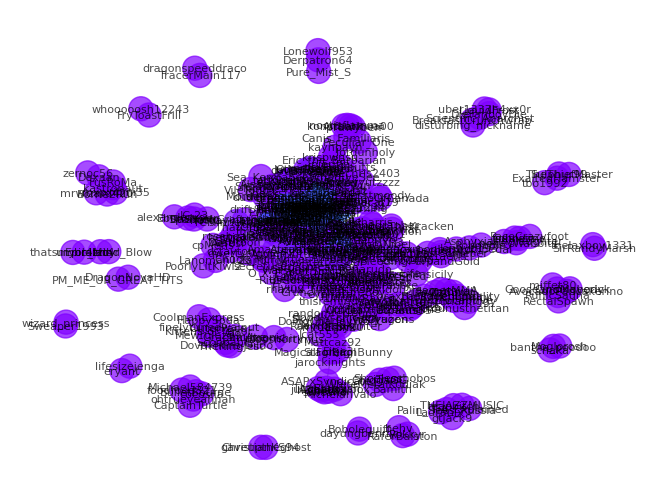

In [30]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

# Connect to Reddit API
reddit = praw.Reddit(
    client_id="Fwa6MK4GdnNkBPp0Xkhe8g",
    client_secret="GQRHo0us27jEBQ9ADqKBz6qVayzsyg",
    user_agent="test by Efficient_Anywhere83",
)

# Choose a subreddit
subreddit_name = "gaming"  # Change to the desired subreddit
subreddit = reddit.subreddit(subreddit_name)

# Get the top post from the subreddit
top_post = next(subreddit.top(limit=1))

# Use the post ID for social network analysis
post_id = top_post.id

# Function to create a social network graph from comments
def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Check if the comment is a MoreComments object
        if isinstance(comment, praw.models.MoreComments):
            continue  # Skip MoreComments objects

        # Check if the comment has a valid author
        if comment.author:
            parent_comment = comment.parent()

            # Check if the parent comment is a MoreComments object
            if isinstance(parent_comment, praw.models.MoreComments):
                continue  # Skip MoreComments objects

            # Check if the parent comment has a valid author
            if parent_comment and parent_comment.author:
                G.add_edge(comment.author, parent_comment.author)

    return G

# Perform social network analysis
social_network = create_social_network(post_id)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(social_network)

# Sort nodes by eigenvector centrality
sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Print the top nodes
top_nodes = sorted_nodes[:5]
print("Top Nodes by Eigenvector Centrality:", top_nodes)

# Set layout algorithm
pos = nx.spring_layout(social_network)

# Draw the graph 
nx.draw(
    social_network,
    pos,
    with_labels=True,
    font_size=8,
    font_color="black",
    node_color=list(eigenvector_centrality.values()),
    cmap=plt.cm.rainbow,
    alpha=0.7,
    edge_color='gray'
)
plt.show()
